<a href="https://colab.research.google.com/github/vincefav/clip-interrogator/blob/main/clip_interrogator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CLIP Interrogator 2.4 by [@pharmapsychotic](https://twitter.com/pharmapsychotic) 

Want to figure out what a good prompt might be to create new images like an existing one? The CLIP Interrogator is here to get you answers!

<br>

For Stable Diffusion 1.X choose the **ViT-L** model and for Stable Diffusion 2.0+ choose the **ViT-H** CLIP Model.

This version is specialized for producing nice prompts for use with Stable Diffusion and achieves higher alignment between generated text prompt and source image. You can try out the old [version 1](https://colab.research.google.com/github/pharmapsychotic/clip-interrogator/blob/v1/clip_interrogator.ipynb) to see how different CLIP models ranks terms. 

You can also run this on HuggingFace and Replicate<br>
[![Generic badge](https://img.shields.io/badge/🤗-Open%20in%20Spaces-blue.svg)](https://huggingface.co/spaces/pharma/CLIP-Interrogator) [![Replicate](https://replicate.com/pharmapsychotic/clip-interrogator/badge)](https://replicate.com/pharmapsychotic/clip-interrogator)

<br>

If this notebook is helpful to you please consider buying me a coffee via [ko-fi](https://ko-fi.com/pharmapsychotic) or following me on [twitter](https://twitter.com/pharmapsychotic) for more cool Ai stuff. 🙂

And if you're looking for more Ai art tools check out my [Ai generative art tools list](https://pharmapsychotic.com/tools.html).


In [ ]:
#@title Check GPU
!nvidia-smi -L

In [1]:
#@title Setup
import os, subprocess

def setup():
    !pip install git+https://github.com/vincefav/clip-interrogator.git
    install_cmds = [
        ['pip', 'install', 'gradio'],
        ['pip', 'install', 'open_clip_torch'],
    ]
    for cmd in install_cmds:
        print(subprocess.run(cmd, stdout=subprocess.PIPE).stdout.decode('utf-8'))

setup()


caption_model_name = 'blip-base' #@param ["blip-base", "blip-large", "git-large-coco"]
clip_model_name = 'ViT-H-14/laion2b_s32b_b79k' #@param ["ViT-L-14/openai", "ViT-H-14/laion2b_s32b_b79k"]

import gradio as gr
from clip_interrogator import Config, Interrogator

config = Config()
config.clip_model_name = clip_model_name
config.caption_model_name = caption_model_name
ci = Interrogator(config)

def image_analysis(image):
    image = image.convert('RGB')
    image_features = ci.image_to_features(image)

    top_mediums = ci.mediums.rank(image_features, 5)
    top_artists = ci.artists.rank(image_features, 5)
    top_movements = ci.movements.rank(image_features, 5)
    top_trendings = ci.trendings.rank(image_features, 5)
    top_flavors = ci.flavors.rank(image_features, 5)
    top_tokens = ci.tokens.rank(image_features, 5)

    medium_ranks = {medium: sim for medium, sim in zip(top_mediums, ci.similarities(image_features, top_mediums))}
    artist_ranks = {artist: sim for artist, sim in zip(top_artists, ci.similarities(image_features, top_artists))}
    movement_ranks = {movement: sim for movement, sim in zip(top_movements, ci.similarities(image_features, top_movements))}
    trending_ranks = {trending: sim for trending, sim in zip(top_trendings, ci.similarities(image_features, top_trendings))}
    flavor_ranks = {flavor: sim for flavor, sim in zip(top_flavors, ci.similarities(image_features, top_flavors))}
    token_ranks = {token: sim for token, sim in zip(top_tokens, ci.similarities(image_features, top_tokens))}
    
    return medium_ranks, artist_ranks, movement_ranks, trending_ranks, flavor_ranks

def image_to_prompt(image, mode):
    ci.config.chunk_size = 2048 if ci.config.clip_model_name == "ViT-L-14/openai" else 1024
    ci.config.flavor_intermediate_count = 2048 if ci.config.clip_model_name == "ViT-L-14/openai" else 1024
    image = image.convert('RGB')
    if mode == 'best':
        return ci.interrogate(image)
    elif mode == 'classic':
        return ci.interrogate_classic(image)
    elif mode == 'fast':
        return ci.interrogate_fast(image)
    elif mode == 'negative':
        return ci.interrogate_negative(image)
        

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/vincefav/clip-interrogator.git to /tmp/pip-req-build-ivggqixe
  Running command git clone --filter=blob:none --quiet https://github.com/vincefav/clip-interrogator.git /tmp/pip-req-build-ivggqixe
  Resolved https://github.com/vincefav/clip-interrogator.git to commit b320f6f17fc6bb905f0516dcb8227b1553ef51b7
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 67.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.3/215.3 kB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 52.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 23.1 MB/s e

Loading CLIP model ViT-H-14/laion2b_s32b_b79k...


ViT-H-14_laion2b_s32b_b79k_artists.safetensors: 100%|██████████| 21.6M/21.6M [00:00<00:00, 123MB/s] 
ViT-H-14_laion2b_s32b_b79k_flavors.safetensors: 100%|██████████| 207M/207M [00:01<00:00, 193MB/s]
ViT-H-14_laion2b_s32b_b79k_mediums.safetensors: 100%|██████████| 195k/195k [00:00<00:00, 6.42MB/s]
ViT-H-14_laion2b_s32b_b79k_movements.safetensors: 100%|██████████| 410k/410k [00:00<00:00, 9.56MB/s]
ViT-H-14_laion2b_s32b_b79k_trendings.safetensors: 100%|██████████| 148k/148k [00:00<00:00, 6.12MB/s]
Preprocessing trendings: 100%|██████████| 1/1 [00:03<00:00,  3.45s/it]
ViT-H-14_laion2b_s32b_b79k_negative.safetensors: 100%|██████████| 84.2k/84.2k [00:00<00:00, 4.98MB/s]
Preprocessing tokens: 100%|██████████| 2/2 [00:17<00:00,  8.69s/it]

Loaded CLIP model and data in 96.15 seconds.


In [ ]:
#@title Image to prompt! 🖼️ -> 📝
   
def prompt_tab():
    with gr.Column():
        with gr.Row():
            image = gr.Image(type='pil', label="Image")
            with gr.Column():
                mode = gr.Radio(['best', 'fast', 'classic', 'negative'], label='Mode', value='best')
        prompt = gr.Textbox(label="Prompt")
    button = gr.Button("Generate prompt")
    button.click(image_to_prompt, inputs=[image, mode], outputs=prompt)

def analyze_tab():
    with gr.Column():
        with gr.Row():
            image = gr.Image(type='pil', label="Image")
        with gr.Row():
            medium = gr.Label(label="Medium", num_top_classes=5)
            artist = gr.Label(label="Artist", num_top_classes=5)        
            movement = gr.Label(label="Movement", num_top_classes=5)
            trending = gr.Label(label="Trending", num_top_classes=5)
            flavor = gr.Label(label="Flavor", num_top_classes=5)
    button = gr.Button("Analyze")
    button.click(image_analysis, inputs=image, outputs=[medium, artist, movement, trending, flavor])

with gr.Blocks() as ui:
    with gr.Tab("Prompt"):
        prompt_tab()
    with gr.Tab("Analyze"):
        analyze_tab()

ui.launch(show_api=False, debug=False)


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Generating prompts:   0%|          | 0/58 [00:00<?, ?it/s]

a painting of a woman with flowers in her hair, art nouveau 3d curves and swirls, airbrush on canvas, intricate highly detailed 8 k, abstract face, encrusted with jewels, oli, giovanni, trending on pixart”


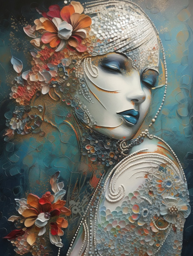

Generating prompts:   2%|▏         | 1/58 [00:34<33:12, 34.96s/it]

a painting of a forest with many different creatures, symmetical face, peter gric and dan mumford, chris dyer, alien waterfall, looking at each other mindlessly, oil on canvas detailed, face to face, facing each other, river styx, 4-dimensional, by Jason Felix, facing sideways, ultra detailed-i, discu


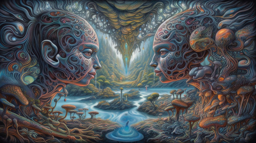

Generating prompts:   3%|▎         | 2/58 [01:30<44:02, 47.18s/it]

a pair of sneakers with glowing lights, art of unreal engine 5, redshift. micro details, jen bartel, wow 4 k detail fantasy, badass anime 8 k, red shoes, doom eternal art style, 4 k detail fantasy, by Emma Andijewska, mydubai


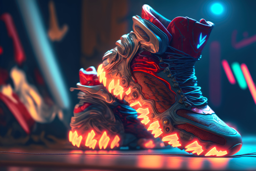

Generating prompts:   5%|▌         | 3/58 [02:14<41:40, 45.47s/it]

a bridge over a river in a garden, mattepainting, venice, cozy place, french village exterior, lush plant and magical details, by Johannes Voss, romantic storybook fantasy, fantasy photography, morning time, realistic architecture


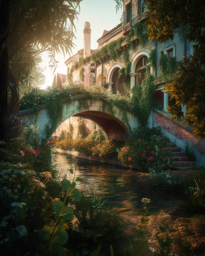

Generating prompts:   7%|▋         | 4/58 [02:57<40:14, 44.72s/it]

a canal with a bridge and a boat in the water, photorealistic concept art, alleys, mid morning lighting, river with low hanging plants, gondola, high res eautiful lighting, intricate and epic concept art, balcony, gorgeous atmosphere, overhaul, las, a wide open courtyard in an epic, oc, canals


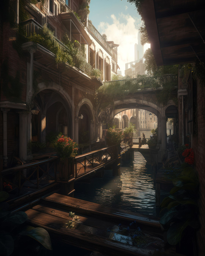

Generating prompts:   9%|▊         | 5/58 [03:56<43:56, 49.74s/it]

a woman sitting at a table with a cup, painted by andreas rocha, hyperrealistic teen, diner, pokimane, charli, smma, in a coffee shop, diego dayer, painterly illustration, age 2 0, speedpaint, serene illustration


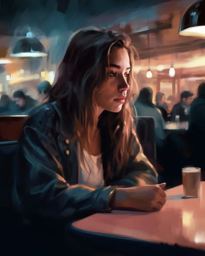

Generating prompts:  10%|█         | 6/58 [04:46<43:13, 49.88s/it]

a painting of two women standing in front of a tree, psychedelic organic cyborg, jordan grimmer and james jean, the three fates, inspired by the Brothers Hildebrandt, facing each other, judy chicago, very full detail, inspired by Emily Murray Paterson, figurative painting, inspired by loish, oil and alien on canvas, mela, benjamin vnuk, evolution


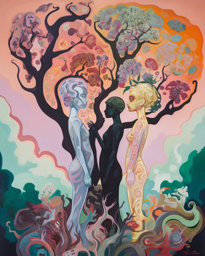

Generating prompts:  12%|█▏        | 7/58 [05:44<44:42, 52.59s/it]

a painting of a woman with her hand on her face, inspired by Cyril Rolando, colorful fire, wadim kashin. ultra realistic, concerned expression, with closed eyes, trending on pixart”, james jean ”, orange and blue colors, pained expression, body made of fire, impasto paint, bin


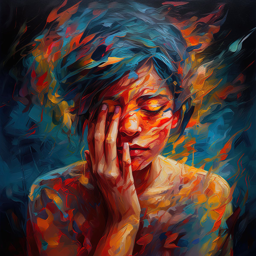

Generating prompts:  14%|█▍        | 8/58 [06:36<43:35, 52.31s/it]

a woman with flowers and butterflies in her hair, vivid psychedelic colors, detailed paintings, orphism style, ornate and flowing, japanese illustrator, detailed painting“, artwork ”, cosmic and colorful, festival of rich colors, colorful mural on walls, courful illustration, programs, center view


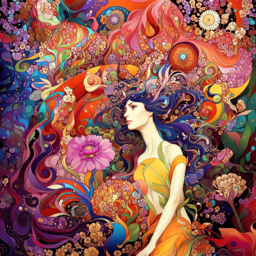

Generating prompts:  16%|█▌        | 9/58 [07:32<43:37, 53.42s/it]

a painting of a train track with a sunset in the background, bright psychedelic color, bridge over the water, james jean andrei riabovitchev, rainbow reflection, dustin lefevre, paint pour smoke, freeway, mirrored, wonderland portal, waterway, big sky, detailed scan”, lava reflections, jean-sebastien rossbach, gateway, river of wine


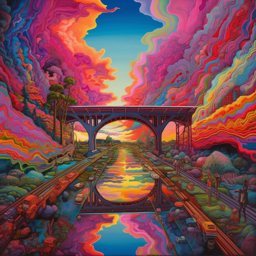

Generating prompts:  17%|█▋        | 10/58 [08:38<45:50, 57.30s/it]

the legend of zeo, makoto shinkai and tom bagshaw, anthem game, ixions wheel, avatar image, lothlorien, today's featured anime still, alternate album cover, peace atmopshere, vanguardist alternate timeline, from overwatch, the emerald herald in the garden, 2 0 1 9 anime, andreas rocha and john howe


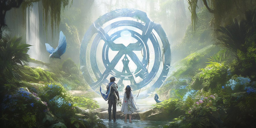

Generating prompts:  19%|█▉        | 11/58 [09:32<44:10, 56.40s/it]

a painting of a couple sitting on a bench in a garden, beeple and jean giraud, josan gonzales!!!, enchanted garden, [[fantasy]], fishing, lemonade, hildebrandt, pascal blanche, right side composition, lush gardens hanging, infinity, mehta, year 2 3 0 0, detailed paintings, darrell k sweet, alphonse musha


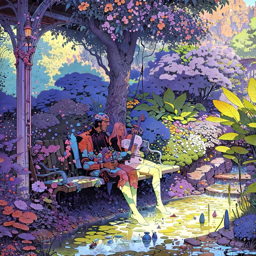

Generating prompts:  21%|██        | 12/58 [10:37<45:14, 59.02s/it]

a painting of a garden with flowers and trees, beeple and tim hildebrandt, castle setting, akihiko yoshida”, by Miwa Komatsu, cypresses, very full detail, summer afternoon, very high detailed, by Edmond Bille, sunken, joseph todorovitch ”


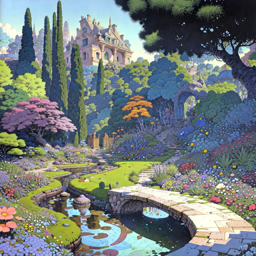

Generating prompts:  22%|██▏       | 13/58 [11:25<41:45, 55.68s/it]

a painting of a garden with a pond and a bench, moebius and kilian eng, fantasy village, by Yoshihiko Wada, detailed image, elves house, ja miyazaki, highly detailed in 4 k ”, detailed color scan”, joseph todorovitch ”


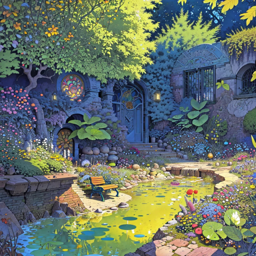

Generating prompts:  24%|██▍       | 14/58 [12:05<37:19, 50.90s/it]

a cityscar with a river and buildings in the background, tranquility of the endless stars, thomas veyrat intricate, tatami galaxy, vibration, ultra detailed-i, anime”, amber, wide open city ”


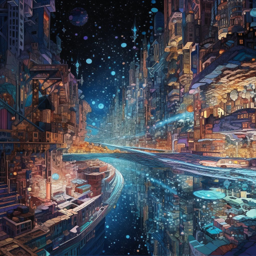

Generating prompts:  26%|██▌       | 15/58 [12:41<33:16, 46.43s/it]

a painting of a hot air balloon flying over mountains, greg hildebrandt and mark brooks, psychadelic, high angle view, ashton, gondola, mid-view, spectrum, hidden valley, greg hildebrant, mid air, elevation, ryan dyar, harmony of


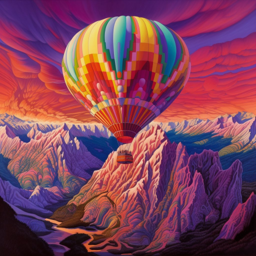

Generating prompts:  28%|██▊       | 16/58 [13:35<34:07, 48.76s/it]

a painting of a hot air balloon flying over a mountain range, jim woodring, ryan dyar, highly detailed muted colors, vortex river, greg rutkowski - h 7 6 8, rise above clouds, hot air balloons, mid view


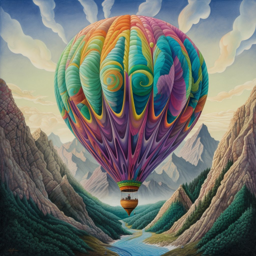

Generating prompts:  29%|██▉       | 17/58 [14:11<30:39, 44.85s/it]

an illustration of a man standing on a planet, 1 9 8 0's heavy metal album art, emerging hands, she-ra, detailed image, cybernetic hands, cel illustration, channeling mana, aq, plasma, the eye of god rah, motu, transformation scene, single image, mew, left hand, cosmic horror illustration, discu, alogue


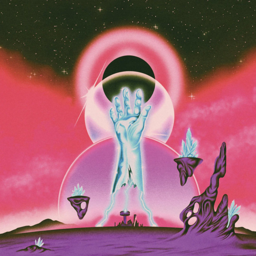

Generating prompts:  31%|███       | 18/58 [15:23<35:25, 53.13s/it]

a painting of a woman holding a black cat, steaming food on the stove, moody morning light, profile portrait, coffee machine, sacrament, girl with brown hair, the blacksmith, inauguration, great light, jenny, completely new, baking a cake, by Jason Benjamin, poster shot, premium prints available, steve huston, true life, ( waitress ) girl, vertical portrait


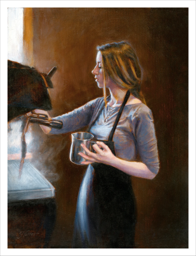

Generating prompts:  33%|███▎      | 19/58 [16:36<38:21, 59.00s/it]

abstract background with colorful paint strokes, intricate iridescent opal armor, embers adrift in the air, by Jacob Toorenvliet, lsd ripples, tweets, amoled wallpaper, fractured reality, melting glass, inspired by Marie Bashkirtseff, paint flecks, full of colors and rich detail, made of lava, by Samuel Scott, interacting


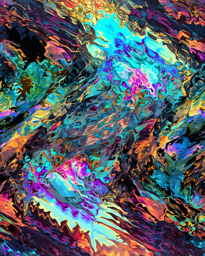

Generating prompts:  34%|███▍      | 20/58 [17:34<37:13, 58.78s/it]

a painting of a dragon and a fire, highly intricate in technicolor, deep chasm, colored album art, ultradetailed mural, mastodon, looking this way, jona, orm, gnarly details, color spread, ft, intricate image, awaken, devouring, evan lee, mana, amber, ruan jian, zer, dragon’s lair


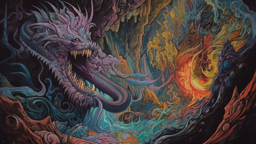

Generating prompts:  36%|███▌      | 21/58 [18:55<40:15, 65.28s/it]

two people in colorful outfits and roller skates on the beach, in the styles of cameron look, 🔥 😎 🕹️ 👀 :2, cyber wear, nbc, vibrant.-h 704, cute rave outfit, hoff, inspired by Jordan Grimmer, willam, tennis wear, outrun, costumes, arcadia, patterned clothing, hivis


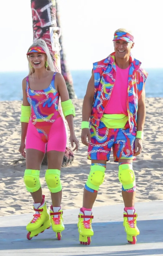

Generating prompts:  38%|███▊      | 22/58 [19:58<38:48, 64.68s/it]

a dragon with a full moon in the background, hyper detailed visionary art, epic full color illustration, at the mountains of madness, intricate details illustration, anime graphic illustration, full of colors and rich detail, painted in the style arcane, dragon head, tran, zedd, oni, py


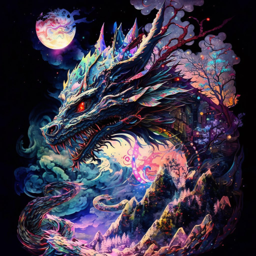

Generating prompts:  40%|███▉      | 23/58 [20:49<35:22, 60.65s/it]

a woman in a gold dress with a golden sun behind her, neoartcore and charlie bowater, jc leyendecker and sachin teng, afrofuturism anime, gold and white, queen of heaven, contest winner 2021, rendering of beauty pageant, light bloom sunlight, halo over her head, loa, magali villeneuve', avatar image


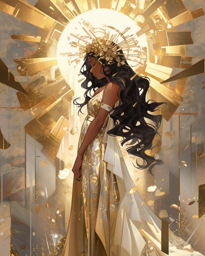

Generating prompts:  41%|████▏     | 24/58 [21:41<32:51, 57.98s/it]

a living room with a fireplace and a large tree, magic library, cherry blossom forest, 🕹️ 😎 🔫 🤖 🚬, breathtaking composition, epic and stunning, kean, li, ❤🔥🍄🌪, full of flowers, biblio, miss aniela, pink forest, high ceilings, marc adamus, hogwarts style, conversation pit


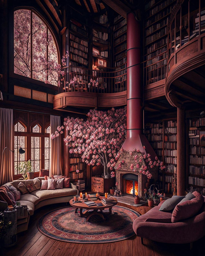

Generating prompts:  43%|████▎     | 25/58 [22:50<33:39, 61.21s/it]

a painting of a person standing on the beach at sunset, amazing colorful background, ufotable art style, red and teal and yellow, rainbow colored clouds, inspired by Andreas Rocha, intricate flowing paint, inspired by Johann Liss, shutterstock, fine art illustration, rainbow reflection, surreal composition, highly detailed oil-painting, a beautiful artwork illustration


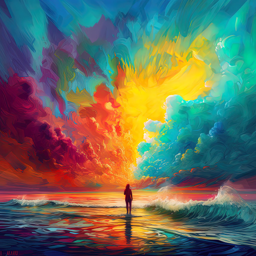

Generating prompts:  45%|████▍     | 26/58 [23:45<31:45, 59.55s/it]

a painting of a building with a pool in the middle, karl spitzweg. unreal engine, roman pillars, petra, david kassan, palace of the chalice, andreas rocha style, within a lake, ancient temple, adorned pillars, ancient”, inside a palace, lus, êµ


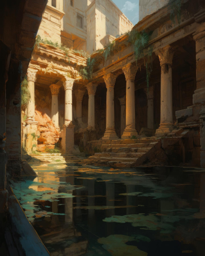

Generating prompts:  47%|████▋     | 27/58 [24:41<30:13, 58.49s/it]

a pink and white abstract painting, 3d fractal background, strings background, swirly tubes, made entirely from gradients, grayish, scarlet background, netting, aluminium, empty background, organic form ”


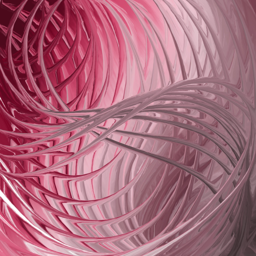

Generating prompts:  48%|████▊     | 28/58 [25:25<27:01, 54.05s/it]

a painting of a demon with a large head and horns, james jean and fenghua zhong, samurai vinyl wrap, highly intricate in technicolor, (smoke), hight detail, zezhou chen, omnibus, lots of swirling, atom, chinese, black bull samurai, in the style of sachin teng, myth, jisu choe, eisen


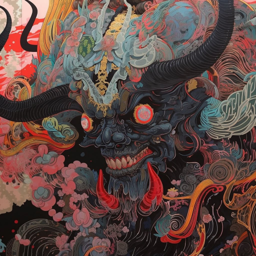

Generating prompts:  50%|█████     | 29/58 [26:27<27:18, 56.49s/it]

an open book with a glowing circuit inside, large cyberarrays data holograms, photo taken of an epic intricate, blue print, storybook, 3 d fractals, on black background, floating spellbook, mobile wallpaper, reading engineering book, edited, three - quarter view, nanotechnology, prof, holographic runes


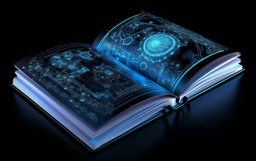

Generating prompts:  52%|█████▏    | 30/58 [27:26<26:42, 57.24s/it]

a lake with a full moon and trees in the background, dan mumford tom bagshaw, casey weldon, highly detailed 4 k painting, symmetrical digital illustration, style of tim hildebrandt, mountain lake, the moon crashes into the earth, fire reflection, in style of kyrill kotashev, foto


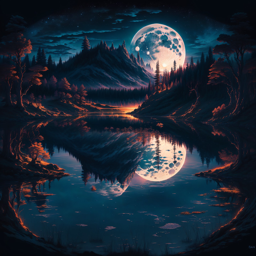

Generating prompts:  53%|█████▎    | 31/58 [28:10<23:57, 53.23s/it]

a castle in the sky with clouds and stars, highly detailed 4 k painting, made of cotton candy, full of colors and rich detail, carina, made entirely from gradients, fairy tale illustrations, art in the style of disney, fantasy”


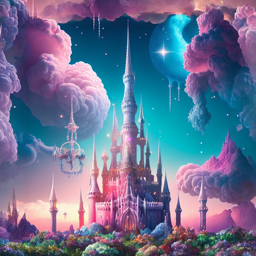

Generating prompts:  55%|█████▌    | 32/58 [28:46<20:49, 48.07s/it]

the elder village in the elder village, fantasy food, epic fantasy art portrait, grocery, [[fantasy]], middle - earth, mercado, ❤🔥🍄🌪, harbor, omg, favorite, las


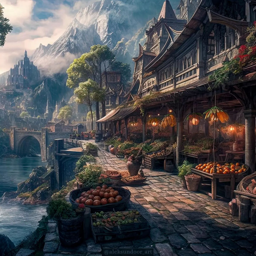

Generating prompts:  57%|█████▋    | 33/58 [29:35<20:04, 48.19s/it]

a stylized illustration of a stylized flower with leaves and swirls, hd phone wallpaper, plume made of fractals, blue and purple plants, intricate beautiful faces, intricate oil sweeps, cory behance hd, cute detailed artwork, fantasy tree, exquisite line art, wow 4 k detail fantasy, amber, beautiful feathers


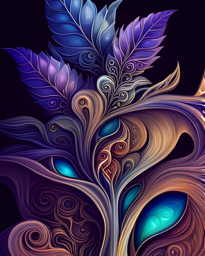

Generating prompts:  59%|█████▊    | 34/58 [30:27<19:43, 49.30s/it]

a purple rose with blue and purple lights, golden and copper shining armor, exquisite and beautiful, alien flowers, Ø³, has a very realistic look to it, 😃😀😄☺🙃😉😗, reddish, mobile wallpaper, profile pic, 5d, pink and blue colour


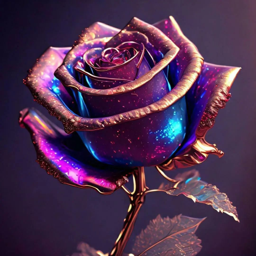

Generating prompts:  60%|██████    | 35/58 [31:17<19:01, 49.63s/it]

a tiger and a man in the jungle, cyberpunk knight, ðŁĩ¦ðŁĩ, artwork in the style of guweiz, inspired by Alejandro Burdisio, detailed lighting and thunder, by Wadim Kashin, in the style dan mumford artwork, ðŁĶĺ, 9gag, maj, energetic beings patrolling


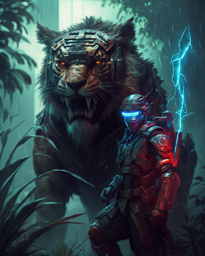

Generating prompts:  62%|██████▏   | 36/58 [32:01<17:36, 48.01s/it]

a car with a view of the city from inside, epic retrowave art, jen bartel, Ð¼, retro - vintage, nerve, maximalist, cybersyn, 1980s photography, lowres, invading, à¸´, alert, maj, taxi, colorful retrofutur


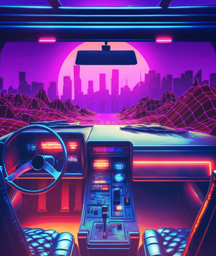

Generating prompts:  64%|██████▍   | 37/58 [33:08<18:44, 53.55s/it]

a tree with a full moon in the background, beeple and james jean, multicolored vector art, extremely psychedelic experience, full figured mother earth, pine tree, pod, mandelbrot flowers and trees, conjunction, ayahuasca, an interdimensional being


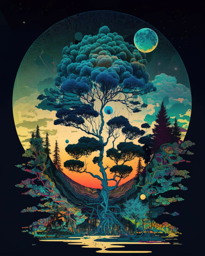

Generating prompts:  66%|██████▌   | 38/58 [33:52<16:54, 50.73s/it]

a painting of a woman in a dress with a hat on her head, in the art style of mohrbacher, emitting spore clouds, akali, inspired by Johannes Helgeson, ascending form the sky, sick, libra, krenzcushart, loish van baarle, liberated, oz, horiz, neural, loth


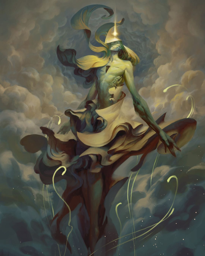

Generating prompts:  67%|██████▋   | 39/58 [34:50<16:47, 53.04s/it]

a painting of a man with horns and flowers, the oracle of trees, gray beard, very detailed and beautiful face, 4k oil on linen, made of vines, elder, ðŁĮ·, full of silver layers, saw, sage, oil on canvas


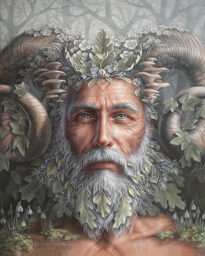

Generating prompts:  69%|██████▉   | 40/58 [35:39<15:31, 51.76s/it]

a painting of a lighthouse in the ocean, seagulls, by Igor Kufayev, rough waves, full - body artwork, painted with a thick brush, hd —h 1024, artwork, professional artwork, olivia kemp, on a pale background, stunning artwork, hd artwork


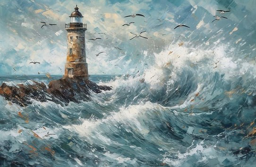

Generating prompts:  71%|███████   | 41/58 [36:31<14:42, 51.93s/it]

a skull with horns and a skull head on it, peter mohrbacher and dan mumford, fractal face, technicolor horror, gaping maw, greg tocchini, face melting into the universe, edgar maxence and ross tran, above view, devil smile, chris moore”


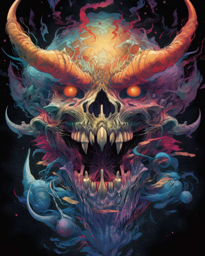

Generating prompts:  72%|███████▏  | 42/58 [37:15<13:12, 49.53s/it]

a ring with fire inside it, magical tree, 8 k highly detailed ❤🔥 🔥 💀 🤖 🚀, beautiful random images, orange and red lighting, the concept of infinity, ðŁĺįðŁĺįðŁĺįðŁĺįðŁĺįðŁĺįðŁĺįðŁĺį


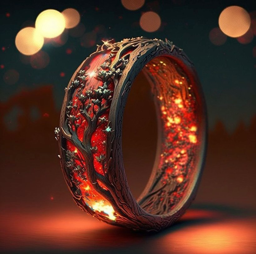

Generating prompts:  74%|███████▍  | 43/58 [37:40<10:32, 42.18s/it]

a girl in the city at night with neon lights, striking detailed artstyle, new album cover, beautiful colors, highres, melting reality, awesome composition, profile picture 1024px, abandoned vibes, vibrant movie poster, directive, girl under lantern, lowres


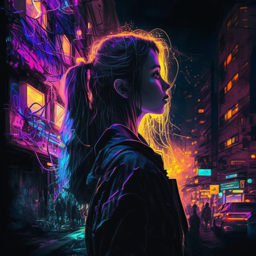

Generating prompts:  76%|███████▌  | 44/58 [38:32<10:28, 44.90s/it]

the final battle of the galactic knights, drew struzan tomasz alen kopera, group portrait, in a castle on an alien planet, inspired by jean moebius giraud, the lich king, mad max beyond thunderdome 1985, fantasy rpg symmetrical portrait, masterpiece”


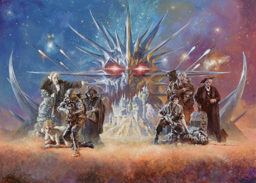

Generating prompts:  78%|███████▊  | 45/58 [39:09<09:12, 42.54s/it]

a painting of a woman in a blue dress, james jean and peter mohrbacher, in its dying breath, wearing flowing robes, lowres, detailed oil, hurricane, adolf wolfli and donato giancola, inspired by Johann Kaspar Füssli, flattened, krenz cushart and artem demura, veiled, apotheosis


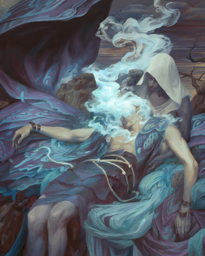

Generating prompts:  79%|███████▉  | 46/58 [39:57<08:50, 44.19s/it]

a woman with a pink hair and blue eyes, in the art style of filip hodas, alexey egorov, neon style, portrait of an elf, by Russell Dongjun Lu, by Nikita Veprikov, by Fyodor Rokotov, katy, omg


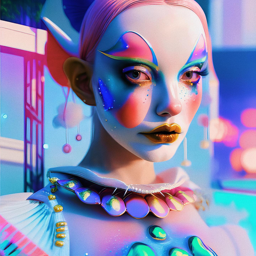

Generating prompts:  81%|████████  | 47/58 [40:37<07:53, 43.06s/it]

a large white sculpture with many statues, intricate realistic fantasy, thawan duchanee, cold colors. insanely detailed, swirling scene, nagas, rendered in rtx, shaved temple, liquid sculpture, Ğ, this is hell, lots of sunlight, how pretty, a close up shot, ðŁĩ¦ðŁĩ, trending in cgsociety


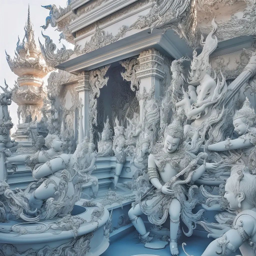

Generating prompts:  83%|████████▎ | 48/58 [41:37<08:02, 48.23s/it]

the elder's village in elder's village, 4k highly detailed digital art, pirate setting, 8k highly detailed ❤️‍🔥 🔥 💀 🤖 🚀, oriental scene, peaceful wooden mansion, :", stunning screensaver, mobile wallpaper, ((unreal engine)), elven city, stunning detailed picture, amazing wallpaper, super high detail picture, tropical location


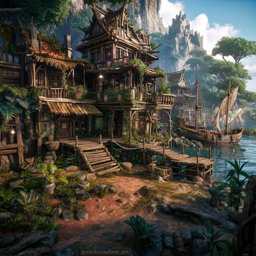

Generating prompts:  84%|████████▍ | 49/58 [42:39<07:49, 52.21s/it]

a woman with blue hair and white hair in water surrounded by lily leaves, featured on polycount, render of april, anaglyph effect, painting of ariana grande, year 2100, spring on saturn, glowing mint face, girl floating in a flower field, trending on artstaion, age 2 0, 4k trending at artstation hq, official poster artwork


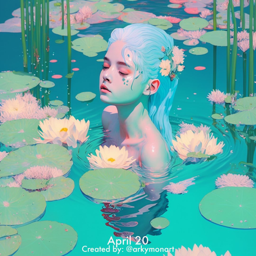

Generating prompts:  86%|████████▌ | 50/58 [43:27<06:47, 50.95s/it]

a painting of a woman and a swan on a swan, greg hildebrandt and mark brooks, darrell k sweet, greek fantasy panorama, riding, the white king, near a lake, seventies era, a digital rendering, todd schorr, philip k d, test, from ramayan, sri, artemis, andrey surnov, folklorethursday


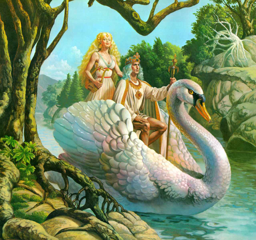

Generating prompts:  88%|████████▊ | 51/58 [44:34<06:30, 55.86s/it]

the hidden island in the hidden island, in a old house. hyper realistic, trending on artstation”, tropical beach paradise, inspired by Luigi Kasimir, inspired by Cornelis Anthonisz, cottage hippie naturalist, ivy, photorealistic print of exotic, realistic cartoon, jinx, inspired by Mike Winkelmann, beachfront, inspired by ferdinand knab


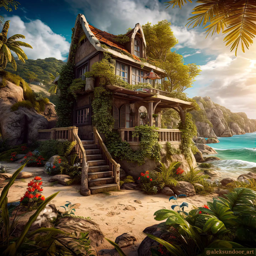

Generating prompts:  90%|████████▉ | 52/58 [45:33<05:40, 56.78s/it]

a statue of a woman with roses in her hand, pink and gold color palette, gold flakes, 🤠 using a 🖥, superb detail 8 k masterpiece, lily frank, marble, by Jin Nong, gold and white, trending on artstattion, showpiece, by Romain brook, maxim sukharev, floral bling


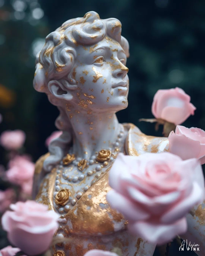

Generating prompts:  91%|█████████▏| 53/58 [46:31<04:45, 57.00s/it]

a statue of a woman with roses in her hair, wallpaper aesthetic, the flower prince, the empress’ swirling gardens, pink rosa, hypnos, lady diana, avatar image, e. h. beatrice blue, posing like a statue, lowres, elegant lady with alabaster skin, pink and blue, gian, beutifull, lofi aesthetic, statues


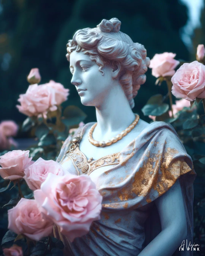

Generating prompts:  93%|█████████▎| 54/58 [47:40<04:03, 60.84s/it]

a statue of a woman with roses in her hair, beautiful faces aesthetic, background image, by Pamela Ascherson, with victorian clothing, with soft pink colors, statue of carving marble, an aesthetic field of flowers, lady diana, masterful intricate artwork, amber, beatifully lit, phone background, carved white marble, masterful


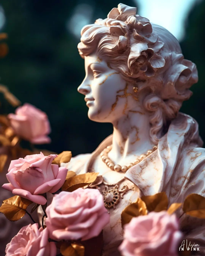

Generating prompts:  95%|█████████▍| 55/58 [48:40<03:01, 60.61s/it]

a group of different colored objects floating in water, concept art of h. r. giger, hourglass volumetric lighting, bottom - view, draped with water and spines, portal. zaha hadid, pouring, cerulean, exuberant organic elegant forms, sperm, cg art, amazing lightning art, dimensional


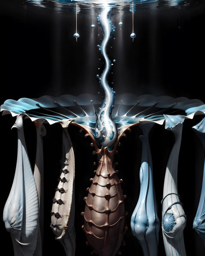

Generating prompts:  97%|█████████▋| 56/58 [49:33<01:56, 58.11s/it]

a woman with face paint and makeup, karol bak uhd, thika, high contrast colours, wakanda, by Dahlov Ipcar, by Dietmar Damerau, by Edwin Georgi, contrastive colors, joseph


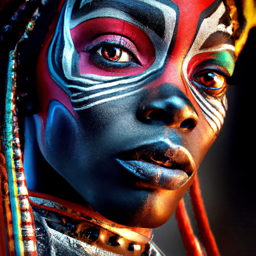

Generating prompts:  98%|█████████▊| 57/58 [50:14<00:52, 52.97s/it]

a waterfall in the middle of a forest with pink flowers, highly realistic digital art, japanese painting, beautiful sunny day, deep clear pools of water, painted in high resolution, inspired by Beeple, [ [ hyperrealistic ] ], new zealand, amazing photo, japanese garden, beautiful detailed pixel art, beautiful painting of a tall, beautifully rendered, arcadia


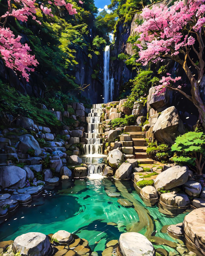

Generating prompts: 100%|██████████| 58/58 [51:14<00:00, 53.01s/it]





Generated 58 prompts and saved to /content/drive/MyDrive/Interrogator/401/desc.csv, enjoy!


In [7]:
#@title Batch process a folder of images 📁 -> 📝

#@markdown This will generate prompts for every image in a folder and either save results 
#@markdown to a desc.csv file in the same folder or rename the files to contain their prompts.
#@markdown The renamed files work well for [DreamBooth extension](https://github.com/d8ahazard/sd_dreambooth_extension)
#@markdown You can use the generated csv in the [Stable Diffusion Finetuning](https://colab.research.google.com/drive/1vrh_MUSaAMaC5tsLWDxkFILKJ790Z4Bl?usp=sharing)

import csv
import os
from IPython.display import clear_output, display
from PIL import Image
from tqdm import tqdm

folder_path = "/content/drive/MyDrive/Interrogator/401" #@param {type:"string"}
prompt_mode = 'best' #@param ["best","fast"]
output_mode = 'rename' #@param ["desc.csv","rename"]
max_filename_len = 192 #@param {type:"integer"}
best_max_flavors = 16 #@param {type:"integer"}


def sanitize_for_filename(prompt: str, max_len: int) -> str:
    name = "".join(c for c in prompt if (c.isalnum() or c in ",._-! "))
    name = name.strip()[:(max_len-4)] # extra space for extension
    return name

ci.config.quiet = True

files = [f for f in os.listdir(folder_path) if f.endswith('.jpg') or f.endswith('.png') or f.endswith('.webp')] if os.path.exists(folder_path) else []
prompts = []
for idx, file in enumerate(tqdm(files, desc='Generating prompts')):
    if idx > 0 and idx % 100 == 0:
        clear_output(wait=True)

    image = Image.open(os.path.join(folder_path, file)).convert('RGB')
    prompt = image_to_prompt(image, prompt_mode)
    prompts.append(prompt)

    print(prompt)
    thumb = image.copy()
    thumb.thumbnail([256, 256])
    display(thumb)

    if output_mode == 'rename':
        name = sanitize_for_filename(prompt, max_filename_len)
        ext = os.path.splitext(file)[1]
        filename = name + ext
        idx = 1
        while os.path.exists(os.path.join(folder_path, filename)):
            print(f'File {filename} already exists, trying {idx+1}...')
            filename = f"{name}_{idx}{ext}"
            idx += 1
        os.rename(os.path.join(folder_path, file), os.path.join(folder_path, filename))
        csv_path = os.path.join(folder_path, 'desc.csv')
        with open(csv_path, 'w', encoding='utf-8', newline='') as f:
            w = csv.writer(f, quoting=csv.QUOTE_MINIMAL)
            w.writerow(['image', 'prompt'])
            for file, prompt in zip(files, prompts):
                w.writerow([file, prompt])


if len(prompts):
    if output_mode == 'desc.csv':
        csv_path = os.path.join(folder_path, 'desc.csv')
        with open(csv_path, 'w', encoding='utf-8', newline='') as f:
            w = csv.writer(f, quoting=csv.QUOTE_MINIMAL)
            w.writerow(['image', 'prompt'])
            for file, prompt in zip(files, prompts):
                w.writerow([file, prompt])

        print(f"\n\n\n\nGenerated {len(prompts)} prompts and saved to {csv_path}, enjoy!")
    else:
        print(f"\n\n\n\nGenerated {len(prompts)} prompts and renamed your files, enjoy!")
else:
    print(f"Sorry, I couldn't find any images in {folder_path}")

In [10]:
csv_path = os.path.join(folder_path, 'desc.csv')
with open(csv_path, 'w', encoding='utf-8', newline='') as f:
    w = csv.writer(f, quoting=csv.QUOTE_MINIMAL)
    w.writerow(['image', 'prompt'])
    for file, prompt in zip(files, prompts):
        w.writerow([file, prompt])